# Numpy vs Pandas

A simple performance test of Numpy vs Pandas for inverting a series.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Random sequence

In [4]:
x = np.random.rand(10**6)

## Inversion methods

In [5]:
def invert_vectorized(s):
    return 1 / s

In [6]:
def invert_by_loop(s):
    s_inv = np.zeros(len(s))
    for i in range(len(s)):
        s_inv[i] = 1 / s[i]
    return s_inv

In [7]:
def invert_by_map(s):
    return s.map(lambda x: 1/x)

## Test

In [8]:
def get_results(n_range, methods, n_samples=100, verbose=True):
    '''Performance test.'''
    results = []
    for name, method in methods.items():
        if verbose:
            print(name)
        results_method = np.zeros((n_samples, len(n_range)))
        for j, n in enumerate(n_range):
            if name != 'numpy':
                s = pd.Series(x[:n])
            else:
                s = x[:n]
            for i in range(n_samples):
                t0 = time.time()
                method(s)
                t1 = time.time()
                results_method[i, j] = t1 - t0
        results.append(results_method.mean(axis=0))
    return np.array(results).T

In [9]:
n_range = [10**i for i in range(2, 7)]

In [10]:
methods = {'numpy': invert_vectorized, 
           'pandas (vector)': invert_vectorized, 
           'pandas (map)': invert_by_map, 
           'loop': invert_by_map}

In [11]:
results = get_results(n_range, methods)

numpy
pandas (vector)
pandas (map)
loop


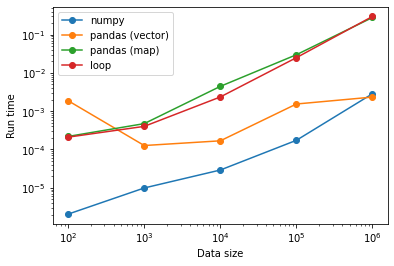

In [23]:
plt.xlabel('Data size')
plt.ylabel('Run time')
plt.xscale('log')
plt.yscale('log')
plt.plot(n_range, results, marker='o')
plt.legend(list(methods))
plt.show()